In [1]:
import gzip
import json
import re
import os
import sys
import numpy as np
import pandas as pd
import sklearn.model_selection
import scipy
import sklearn.metrics.pairwise as pw
from time import time
import matplotlib.pyplot as plt

In [2]:
# Specify your directory
DIR = r'C:\Users\Jackie\OneDrive - Georgia Institute of Technology\ISYE6740 Computational Data Analytics\Project\Data\Genres\YoungAdult'

In [3]:
# Load pickled files
df = pd.read_pickle('atleast500ratings50books.pkl')

In [4]:
df['book_id'].value_counts()

2767052     46342
41865       40894
6148028     39578
7260188     38465
256683      37238
            ...  
14762463      116
7776692       107
18626858      105
6596839        93
1242729        45
Name: book_id, Length: 1949, dtype: int64

In [5]:
# Calculate average rating
avg_rating = np.mean(df['rating'])
avg_rating

3.9592542580101724

In [6]:
# Define user-book rating matrix
mat = df.pivot(index='user_id', columns='book_id', values='rating')
mat.replace(0, np.nan, inplace=True)

In [7]:
mat

book_id,10025007,10025305,10048874,10118172,10165727,10165761,10174795,10188580,101914,10193062,...,9917938,9917945,9917998,9918083,9918128,99561,9961796,9972838,9972882,9975679
user_id,,,,,,,,,,,,,,,,,,,,,
000192962b87d560f00b06fdcbd71681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
000387b0e3d77b6dcc36a66d5cc27347,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,3.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
0007f8dd09337afd986d765569cf0110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
000883382802f2d95a3dd545bb953882,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000891e40dc9b9a6726caff9232be979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffbeab06c4060af4387a8922bf017cc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fffcca008c7770bc559e43b2edf24a6d,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
fffce7dae5ac5e8fb6288d81658ececc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN


In [8]:
# Train/test split
train, test = sklearn.model_selection.train_test_split(df, test_size=0.1, random_state=1111)
train.shape, test.shape

((4896776, 10), (544087, 10))

In [9]:
# Save train values
mat_trainonly = mat
training_mask = np.array(mat_trainonly.notna())
train_actuals = np.array(mat_trainonly)[training_mask]

# Set all test values to nan
zipped_test = np.c_[test['user_id'], test['book_id'], test['rating']]
test_mask = np.full(mat.shape, False)
for i in range(len(zipped_test)):
    row_idx = mat_trainonly.index.get_loc(zipped_test[i][0])
    col_idx = mat_trainonly.columns.get_loc(zipped_test[i][1])
    test_mask[row_idx, col_idx] = True
test_actuals = np.array(mat)[test_mask] # Save test actuals
mat_trainonly[test_mask] = np.nan

In [10]:
train_actuals, test_actuals

(array([3., 4., 1., ..., 3., 3., 3.]), array([1., 4., 5., ..., 5., 3., 3.]))

In [11]:
# Calculate sparsity of data
not_null = mat_trainonly.count().sum()
sparsity = 1 - not_null / (mat.shape[0] * mat_trainonly.shape[1])
sparsity

0.955105860584201

In [12]:
mat_trainonly.count().sort_values(ascending=False)

book_id
2767052     41720
41865       36939
6148028     35641
7260188     34663
256683      33513
            ...  
14762463      107
7776692       100
18626858      100
6596839        82
1242729        37
Length: 1949, dtype: int64

In [13]:
# Calculate average rating for each book over users
avg_book_rating = np.nanmean(mat_trainonly, axis=0) # column avg r_j
# For empty columns, fill with avg rating
np.nan_to_num(avg_book_rating, copy=False, nan=avg_rating)

# Fill missing value with the appropriate average for that book
filled = np.where(np.isnan(mat_trainonly), avg_book_rating, mat_trainonly)

# Remove from each user (row) the mean over all books
avg_user_rating = np.average(filled, axis=1) # row avg r_i
avg_user_rating_col_vec = avg_user_rating.reshape(len(avg_user_rating),1)
normalized = filled - avg_user_rating_col_vec

In [14]:
# Helper functions for prediction calculation
## Select/Rearrange the solumns of arr to match the indices (given by idx)
def select_cols(arr, idx):
    rows = np.indices(idx.shape)[0]
    return arr[rows, idx]

## Set the select columns of arr specified by idx to the corresponding values in vals
def set_select_cols(arr, vals, idx):
    selected_vals = select_cols(vals, idx)
    rows = np.indices(idx.shape)[0]
    arr[rows, idx] = selected_vals
    
# Helper function for evaluation
## Define error function
def rmse(predictions, actuals):
    return np.sqrt(((predictions - actuals) ** 2).mean())

In [15]:
# Tune rank k for SVD
ks = [1,2,3,4,5,6,7,8,9,10,11,12,13,15,17,19]
errors4k = pd.DataFrame(index=ks, columns=['train_rmse', 'test_rmse'])

for k in ks:
    # Perform SVD using rank k
    U, S, VT = scipy.sparse.linalg.svds(normalized, k=k)
    # Calculate a reduced rating matrix to remove noise
    reduced_rating = U @ np.diag(S) @ VT
    # Calculate matrix product for dimensionality-reduced rating matrix
    sqrtS = np.diag(np.sqrt(S))
    meta_on_users = U @ np.transpose(sqrtS)
    meta_on_items = sqrtS @ VT
    # Calculate similarities between books
    num_books = reduced_rating.shape[1]
    similarities = pw.cosine_similarity(meta_on_items.T, meta_on_items.T)
    # Calculate prediction of rating by user i of book j, by avging over the ratings of all books by the same user, each weighted according to its similarity to book j
    num_users = reduced_rating.shape[0]
    predictions = np.zeros((num_users, num_books))
    # Isolate the set of items which appear to be the most similar to the active item. Vozalis suggests 10 items is best.
    adjusted_rating = reduced_rating + avg_user_rating[:,np.newaxis]

    most_similar_idx = np.argsort(similarities, axis=1)[:,:-11:-1]
    nonneg_sims = np.where(similarities > 0, similarities, 0)
    selected_sims = np.zeros(nonneg_sims.shape)
    set_select_cols(selected_sims, nonneg_sims, most_similar_idx)

    numerator = adjusted_rating @ selected_sims.T
    denominator = np.sum(selected_sims, axis=1)
    predictions = np.divide(numerator, denominator)
    # Calculate training error
    train_predictions = predictions[training_mask]
    train_rmse = rmse(train_predictions, train_actuals)
    errors4k['train_rmse'][k] = train_rmse
    # Calculate test error
    test_predictions = predictions[test_mask]
    test_rmse = rmse(test_predictions, test_actuals)
    errors4k['test_rmse'][k] = test_rmse

In [16]:
train_actuals, test_actuals

(array([3., 4., 1., ..., 3., 3., 3.]), array([1., 4., 5., ..., 5., 3., 3.]))

In [17]:
errors4k

,train_rmse,test_rmse
1,0.958952,0.959992
2,0.933502,0.93766
3,0.92247,0.928929
4,0.912694,0.92078
5,0.907953,0.917927
6,0.903075,0.914535
7,0.899424,0.912491
8,0.895774,0.910239
9,0.895533,0.911364
10,0.89317,0.910287


In [18]:
# BEST COMPARISON
# Calculate error if just rated everything the avg rating per book across all users
avg_book_rating_row = avg_book_rating.reshape((1, mat_trainonly.shape[1]))
mat_bookavg = pd.DataFrame(np.repeat(avg_book_rating_row, mat_trainonly.shape[0], axis=0), index=mat_trainonly.index, columns=mat_trainonly.columns)

book_avg_train = np.array(mat_bookavg)[training_mask]
book_avg_train_rmse = rmse(book_avg_train, train_actuals)
book_avg_test = np.array(mat_bookavg)[test_mask]
book_avg_test_rmse = rmse(book_avg_test, test_actuals)
book_avg_train_rmse, book_avg_test_rmse

(0.9541257664501664, 0.9543001512881961)

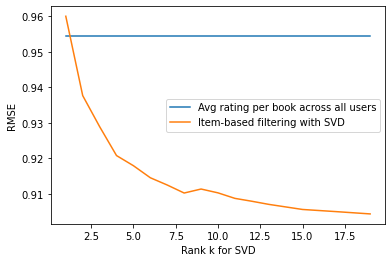

In [21]:
plt.plot(ks, np.repeat(book_avg_test_rmse, len(ks)), label='Avg rating per book across all users')
plt.plot(ks, errors4k['test_rmse'], label='Item-based filtering with SVD')
plt.xlabel('Rank k for SVD')
plt.ylabel('RMSE')
plt.legend()
plt.show()

Optimal is k=6

In [22]:
errors4k.loc[6]

train_rmse    0.903075
test_rmse     0.914535
Name: 6, dtype: object

# To Delete

In [20]:
# Perform SVD using rank k, and calculate a reduced rating matrix to remove noise
# Can use sparse matrix algorithms because of special structure
# Order of singular values isn't guaranteed, so should calculate every time
# How to choose k: if top few values are big and the rest are small, take the big values. So chose k=11
t1 = time()
U, S, VT = scipy.sparse.linalg.svds(normalized, k=25) 
t2 = time()
print(t2-t1)

12.476125717163086


In [17]:
S

array([ 130.47905597,  132.69526853,  134.70073591,  136.61775279,
        138.05557606,  139.51452152,  141.97916667,  143.67110472,
        144.73496779,  147.96188017,  150.1459057 ,  150.71972107,
        156.98341679,  159.91751489,  162.21256363,  166.50308162,
        168.40416234,  173.20146612,  181.10067362,  197.11094996,
        206.02246783,  235.884627  ,  288.90619312,  426.87582176,
       3100.82739549])

In [19]:
U

array([[-0.00046715, -0.00044049, -0.00138716, ...,  0.00562333,
         0.00488307, -0.00431281],
       [ 0.00031903,  0.00554467, -0.00243229, ...,  0.00487235,
         0.00487056, -0.00442198],
       [-0.00290675,  0.00191324, -0.00425375, ..., -0.00473644,
        -0.00660645, -0.00424763],
       ...,
       [ 0.00380254,  0.00278424, -0.00677672, ..., -0.00262208,
         0.00105803, -0.00426104],
       [-0.00029891,  0.00089715, -0.00588027, ..., -0.00583453,
        -0.00165845, -0.00412466],
       [-0.00446268,  0.0054141 , -0.00056276, ...,  0.00321119,
        -0.00171015, -0.00443403]])

In [18]:
U.shape, S.shape, VT.shape

((55964, 25), (25,), (25, 1949))

In [30]:
reduced_rating = U @ np.diag(S) @ VT

In [31]:
reduced_rating # SHOULD THIS BE >=1? Maybe not, because it's already been reduced

array([[-0.06375013,  0.63695487, -0.05966438, ..., -0.49593893,
        -0.40232736, -0.03561533],
       [-0.06330713,  0.59561203, -0.05858645, ..., -0.51451268,
        -0.41004404, -0.03819888],
       [-0.0879846 ,  0.62221055, -0.07390579, ..., -0.51213455,
        -0.41935211, -0.04417875],
       ...,
       [-0.06499185,  0.37801491, -0.05764105, ..., -0.50804553,
        -0.40583802, -0.03837744],
       [-0.06843728,  0.57969268, -0.05756482, ..., -0.47986264,
        -0.39482071, -0.03595433],
       [-0.08411582,  0.88109445, -0.07447446, ..., -0.51381137,
        -0.42639264, -0.04173111]])

In [32]:
reduced_rating.shape

(55964, 1949)

In [33]:
# Calculate matrix product for dimensionality-reduced rating matrix
sqrtS = np.diag(np.sqrt(S))
meta_on_users = U @ np.transpose(sqrtS)
meta_on_items = sqrtS @ VT

In [34]:
meta_on_items

array([[-0.02029993, -0.83960888,  0.01242481, ..., -0.06379012,
         0.0448467 , -0.00947241],
       [-0.02450386, -1.45251749, -0.03678856, ..., -0.05269281,
        -0.07278831,  0.007491  ],
       [-0.10436373,  0.35629587, -0.03372403, ...,  0.13061514,
         0.01977485,  0.0584226 ],
       [-0.05735262,  1.26338982, -0.05279932, ..., -0.04960085,
         0.03970588, -0.04015086],
       [-0.11333262,  0.95613812, -0.09449757, ..., -0.16667095,
        -0.08131211, -0.08496637],
       [ 0.29325263, -2.61871547,  0.26370736, ...,  2.1120926 ,
         1.71378214,  0.16766577]])

In [35]:
num_books = reduced_rating.shape[1]
t1 = time()
similarities = pw.cosine_similarity(meta_on_items.T, meta_on_items.T)
t2 = time()

In [36]:
similarities.shape, t2-t1

((1949, 1949), 0.013539791107177734)

In [37]:
# # TODO: try optimizing
# # Calculate prediction of rating by user i of book j, by avging over the ratings of all books by the same user, each weighted according to its similarity to book j
# num_users = reduced_rating.shape[0]
# predictions = np.zeros((num_users, num_books))

# # Isolate the set of items which appear to be the most similar to the active item. Vozalis suggests 10 items is best.
# most_similar_idx = np.argsort(similarities, axis=1)[:,-10:]
# for a in range(num_users):
#     for j in range(num_books):
#         numerator = 0
#         denominator = 0
#         # check that similarities are non-negative
#         for k in most_similar_idx[j,:]:
#             sim = similarities[j,k]
#             if sim < 0:
#                 break
#             numerator += sim * (reduced_rating[a,k] + avg_user_rating[a])
#             denominator += sim
#         predictions[a,j] = numerator/denominator

In [38]:
## Select/Rearrange the solumns of arr to match the indices (given by idx)
def select_cols(arr, idx):
    rows = np.indices(idx.shape)[0]
    return arr[rows, idx]

## Set the select columns of arr specified by idx to the corresponding values in vals
def set_select_cols(arr, vals, idx):
    selected_vals = select_cols(vals, idx)
    rows = np.indices(idx.shape)[0]
    arr[rows, idx] = selected_vals
    

# Calculate prediction of rating by user i of book j, by avging over the ratings of all books by the same user, each weighted according to its similarity to book j
num_users = reduced_rating.shape[0]
predictions = np.zeros((num_users, num_books))

# Isolate the set of items which appear to be the most similar to the active item. Vozalis suggests 10 items is best.
t1 = time()

adjusted_rating = reduced_rating + avg_user_rating[:,np.newaxis]

most_similar_idx = np.argsort(similarities, axis=1)[:,:-11:-1]
nonneg_sims = np.where(similarities > 0, similarities, 0)
selected_sims = np.zeros(nonneg_sims.shape)
set_select_cols(selected_sims, nonneg_sims, most_similar_idx)

numerator = adjusted_rating @ selected_sims.T
denominator = np.sum(selected_sims, axis=1)
predictions = np.divide(numerator, denominator)

t2 = time()

print(t2 - t1, predictions.shape, np.min(predictions), np.max(predictions))
predictions

5.186373949050903 (55964, 1949) 1.3163800654997984 5.501049560510334


array([[3.81011945, 4.37270623, 3.79488256, ..., 3.38491386, 3.45548021,
        3.8257031 ],
       [3.7761022 , 4.28553617, 3.75989031, ..., 3.33229487, 3.41091968,
        3.78858979],
       [3.81365192, 4.39772294, 3.8020693 , ..., 3.38837321, 3.46072494,
        3.83460368],
       ...,
       [3.81015607, 4.12258765, 3.79593128, ..., 3.37071932, 3.44896766,
        3.82266504],
       [3.80284402, 4.31015864, 3.79295422, ..., 3.39207376, 3.45665655,
        3.82125989],
       [3.79539664, 4.61967066, 3.78220149, ..., 3.36888637, 3.43560671,
        3.81799593]])

In [39]:
# Define error function
def rmse(predictions, actuals):
    return np.sqrt(((predictions - actuals) ** 2).mean())

In [40]:
# Calculate training error
training_mask = np.array(mat_trainonly.notna())
train_predictions = predictions[training_mask]
train_actuals = np.array(mat_trainonly)[training_mask]
train_rmse = rmse(train_predictions, train_actuals)
train_rmse

0.9017928789154106

In [41]:
train_predictions, train_actuals

(array([3.8705314 , 4.10921929, 4.15750083, ..., 4.28969739, 3.63721753,
        3.67024378]),
 array([3., 4., 5., ..., 5., 3., 3.]))

In [42]:
# Calculate test error
#zipped_test = np.c_[test['user_id'], test['book_id'], test['rating']]
test_predictions = predictions[test_mask]
test_rmse = rmse(test_predictions, test_actuals)
test_rmse

0.9145350083745388

In [43]:
test_predictions[:10], test_actuals[:10]

(array([2.87910627, 4.15277419, 4.06934331, 3.91008686, 4.13087439,
        3.8032719 , 3.6878946 , 3.88998835, 4.2850793 , 4.35351137]),
 array([1., 4., 5., 4., 4., 4., 4., 5., 5., 5.]))

In [44]:
# Calculate error if just rated everything the avg rating across all books and users
avg_train = np.full(train_actuals.shape, avg_rating)
avg_train_rmse = rmse(avg_train, train_actuals)
avg_test = np.full(test_actuals.shape, avg_rating)
avg_test_rmse = rmse(avg_test, test_actuals)
avg_train_rmse, avg_test_rmse

(1.0022646680937237, 1.001751619387869)

In [45]:
avg_book_rating_row = avg_book_rating.reshape((1, mat_trainonly.shape[1]))
mat_bookavg = pd.DataFrame(np.repeat(avg_book_rating_row, mat_trainonly.shape[0], axis=0), index=mat_trainonly.index, columns=mat_trainonly.columns)
mat_bookavg

book_id,10025007,10025305,10048874,10118172,10165727,10165761,10174795,10188580,101914,10193062,...,9917938,9917945,9917998,9918083,9918128,99561,9961796,9972838,9972882,9975679
user_id,,,,,,,,,,,,,,,,,,,,,
000192962b87d560f00b06fdcbd71681,3.817178,4.499183,3.824083,3.814786,4.493987,4.582965,3.427642,3.937107,3.924779,4.071099,...,3.932305,4.192308,4.267959,4.28265,4.002677,4.025652,4.095889,3.388805,3.482671,3.846611
000387b0e3d77b6dcc36a66d5cc27347,3.817178,4.499183,3.824083,3.814786,4.493987,4.582965,3.427642,3.937107,3.924779,4.071099,...,3.932305,4.192308,4.267959,4.28265,4.002677,4.025652,4.095889,3.388805,3.482671,3.846611
0007f8dd09337afd986d765569cf0110,3.817178,4.499183,3.824083,3.814786,4.493987,4.582965,3.427642,3.937107,3.924779,4.071099,...,3.932305,4.192308,4.267959,4.28265,4.002677,4.025652,4.095889,3.388805,3.482671,3.846611
000883382802f2d95a3dd545bb953882,3.817178,4.499183,3.824083,3.814786,4.493987,4.582965,3.427642,3.937107,3.924779,4.071099,...,3.932305,4.192308,4.267959,4.28265,4.002677,4.025652,4.095889,3.388805,3.482671,3.846611
000891e40dc9b9a6726caff9232be979,3.817178,4.499183,3.824083,3.814786,4.493987,4.582965,3.427642,3.937107,3.924779,4.071099,...,3.932305,4.192308,4.267959,4.28265,4.002677,4.025652,4.095889,3.388805,3.482671,3.846611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffbeab06c4060af4387a8922bf017cc,3.817178,4.499183,3.824083,3.814786,4.493987,4.582965,3.427642,3.937107,3.924779,4.071099,...,3.932305,4.192308,4.267959,4.28265,4.002677,4.025652,4.095889,3.388805,3.482671,3.846611
fffcca008c7770bc559e43b2edf24a6d,3.817178,4.499183,3.824083,3.814786,4.493987,4.582965,3.427642,3.937107,3.924779,4.071099,...,3.932305,4.192308,4.267959,4.28265,4.002677,4.025652,4.095889,3.388805,3.482671,3.846611
fffce7dae5ac5e8fb6288d81658ececc,3.817178,4.499183,3.824083,3.814786,4.493987,4.582965,3.427642,3.937107,3.924779,4.071099,...,3.932305,4.192308,4.267959,4.28265,4.002677,4.025652,4.095889,3.388805,3.482671,3.846611
